<a href="https://colab.research.google.com/github/ishika1228/Student-Performance-Analysis/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

In [4]:
#Mount your Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Load dataset
import pandas as pd
path ="/content/drive/MyDrive/Assignment/StudentsPerformance.csv"
df = pd.read_csv(path)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# Display first few rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# Check for missing values
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [8]:
# Check data types and basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# Optional: Rename columns for convenience
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

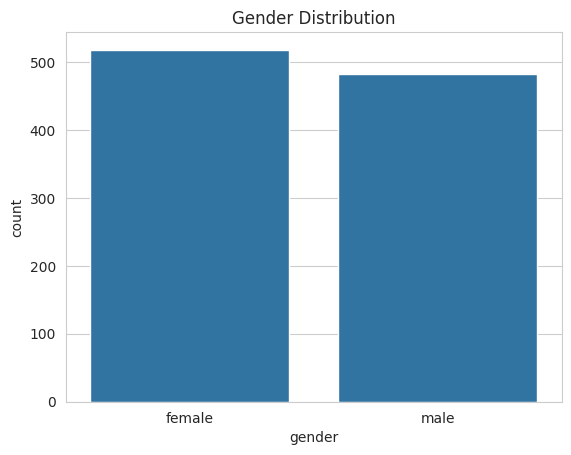

In [10]:
# Perform EDA using visualizations
# Gender distribution
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

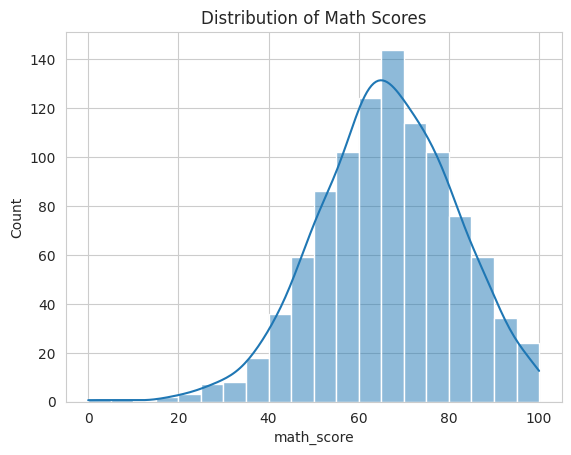

In [11]:
# Distribution of math scores
sns.histplot(df['math_score'], kde=True, bins=20)
plt.title("Distribution of Math Scores")
plt.show()

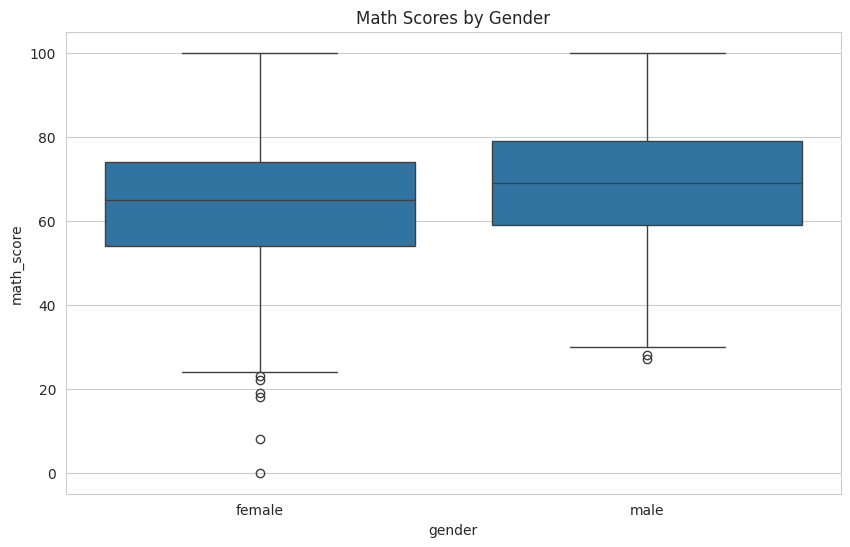

In [12]:
# Compare scores by gender
plt.figure(figsize=(10,6))
sns.boxplot(x='gender', y='math_score', data=df)
plt.title("Math Scores by Gender")
plt.show()

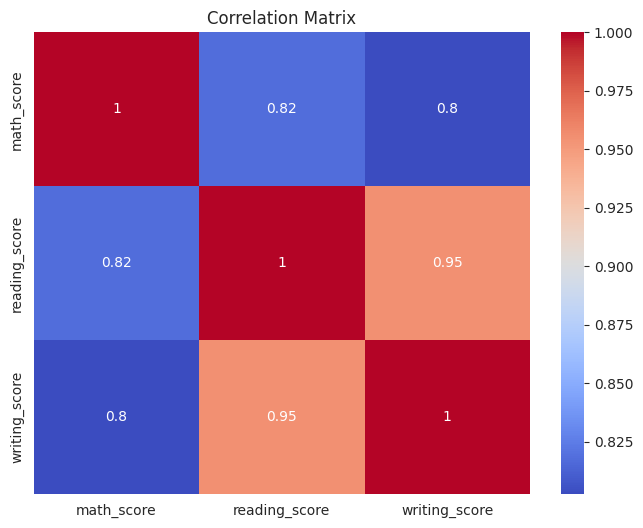

In [13]:
# Correlation heatmap (only numeric columns)
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [14]:
#Predict pass/fail using classification
# Create a pass/fail target: Assume passing is avg score >= 40
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
df['pass'] = df['average_score'].apply(lambda x: 1 if x >= 40 else 0)

In [15]:
#Encode categorical variables
# Convert categorical to numerical using one-hot encoding
df_encoded = pd.get_dummies(df.drop(['average_score'], axis=1), drop_first=True)

In [16]:
#Train/test split and model training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Define X and y
X = df_encoded.drop('pass', axis=1)
y = df_encoded['pass']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
#Model evaluation
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.995
Confusion Matrix:
 [[  9   1]
 [  0 190]]
F1 Score: 0.9973753280839895
